In [ ]:
#program to implement K means clustring algoritham using any standard dataset availabele in public domain and find accuracy of the algoritham

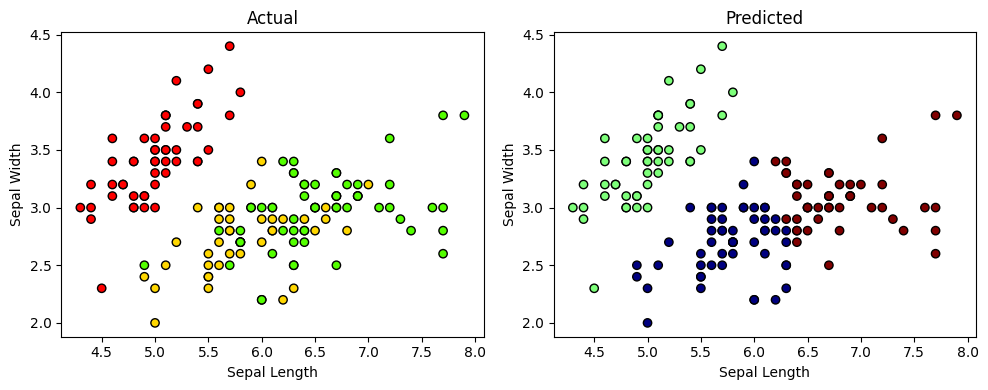

In [11]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load Iris data (first two features)
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=21)
kmeans.fit(X)
labels = kmeans.labels_

plt.figure(figsize=(10, 4))

# Left plot: Actual labels
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='prism', edgecolor='k')
plt.title('Actual')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Right plot: Predicted clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='jet', edgecolor='k')
plt.title('Predicted')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.tight_layout()
plt.show()
# Plot actual vs predicted clusters
# fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='prism', edgecolor='k', s=75)
# axes[0].set_title('Actual Labels')
# axes[0].set_xlabel('Sepal Length')
# axes[0].set_ylabel('Sepal Width')

# axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='jet', edgecolor='k', s=75)
# axes[1].set_title('K-Means Clusters')
# axes[1].set_xlabel('Sepal Length')
# axes[1].set_ylabel('Sepal Width')

# plt.tight_layout()
# plt.show()


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score, normalized_mutual_info_score
from scipy.optimize import linear_sum_assignment
import numpy as np

# Function to match clusters to actual labels
def map_clusters(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-cm)
    mapping = {col: row for row, col in zip(row_ind, col_ind)}
    return np.array([mapping[label] for label in y_pred])

# Map cluster labels to actual labels
mapped_labels = map_clusters(y, labels)

# Calculate metrics
accuracy = accuracy_score(y, mapped_labels)
ari = adjusted_rand_score(y, labels)
nmi = normalized_mutual_info_score(y, labels)
conf_matrix = confusion_matrix(y, mapped_labels)

# Display metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.820
Adjusted Rand Index (ARI): 0.601
Normalized Mutual Information (NMI): 0.647
Confusion Matrix:
 [[50  0  0]
 [ 0 38 12]
 [ 0 15 35]]


# Do not write below code

In [ ]:
#do not write below code
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import numpy as np

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
true_labels = iris.target

In [3]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)


In [4]:
# Evaluate clustering performance
ari = adjusted_rand_score(true_labels, cluster_labels)
nmi = normalized_mutual_info_score(true_labels, cluster_labels)

print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")


Adjusted Rand Index (ARI): 0.730
Normalized Mutual Information (NMI): 0.758
